In [ ]:
#import all required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from plotly import tools
from chart_studio import plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import gc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# define a date conversion function
import datetime, pytz
def dateparse (time_in_secs):    
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))
# read the csv file
data = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv', parse_dates=[0], date_parser=dateparse)

In [ ]:
# Info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016354 entries, 0 to 2016353
Data columns (total 8 columns):
 #   Column             Dtype              
---  ------             -----              
 0   Timestamp          datetime64[ns, UTC]
 1   Open               float64            
 2   High               float64            
 3   Low                float64            
 4   Close              float64            
 5   Volume_(BTC)       float64            
 6   Volume_(Currency)  float64            
 7   Weighted_Price     float64            
dtypes: datetime64[ns, UTC](1), float64(7)
memory usage: 123.1 MB


In [ ]:
# Printing the first 5 rows of data
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 00:33:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,2014-12-01 00:34:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-01 00:35:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-01 00:36:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-01 00:37:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Filling null value to 0
data['Volume_(BTC)'].fillna(value=0, inplace=True)
data['Volume_(Currency)'].fillna(value=0, inplace=True)
data['Weighted_Price'].fillna(value=0, inplace=True)
# Filling the required values to forward fill using fillna()
data['Open'].fillna(method='ffill', inplace=True)
data['High'].fillna(method='ffill', inplace=True)
data['Low'].fillna(method='ffill', inplace=True)
data['Close'].fillna(method='ffill', inplace=True)

data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 00:33:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,2014-12-01 00:34:00+00:00,300.0,300.0,300.0,300.0,0.00,0.0,0.0
2,2014-12-01 00:35:00+00:00,300.0,300.0,300.0,300.0,0.00,0.0,0.0
3,2014-12-01 00:36:00+00:00,300.0,300.0,300.0,300.0,0.00,0.0,0.0
4,2014-12-01 00:37:00+00:00,300.0,300.0,300.0,300.0,0.00,0.0,0.0


In [ ]:
# Defining start and end date for data analysis
start = datetime.datetime(2015, 1, 1, 0, 0, 0, 0, pytz.UTC)
end = datetime.datetime(2018, 11, 11, 0, 0, 0, 0, pytz.UTC)
#Converting the data from daily to weekly for data analysis
weekly_rows = data[(data['Timestamp'] >= start) & (data['Timestamp'] <= end)].groupby([pd.Grouper(key='Timestamp', freq='W-MON')]).first().reset_index()
weekly_rows.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2015-01-12 00:00:00+00:00,360.00,360.00,360.00,360.00,0.0100,3.600000,360.000000
1,2015-01-19 00:00:00+00:00,260.00,260.00,260.00,260.00,0.0000,0.000000,0.000000
2,2015-01-26 00:00:00+00:00,225.51,225.51,225.51,225.51,0.0000,0.000000,0.000000
3,2015-02-02 00:00:00+00:00,261.49,261.50,261.49,261.50,0.6100,159.513900,261.498197
4,2015-02-09 00:00:00+00:00,238.07,238.07,238.06,238.06,0.0533,12.688708,238.062064


In [ ]:
# Ploting a graph of bitcoin prices
trace1 = go.Scatter(
    x = weekly_rows['Timestamp'],
    y = weekly_rows['Open'].astype(float),
    mode = 'lines',
    name = 'Open'
)

trace2 = go.Scatter(
    x = weekly_rows['Timestamp'],
    y = weekly_rows['Close'].astype(float),
    mode = 'lines',
    name = 'Close'
)
trace3 = go.Scatter(
    x = weekly_rows['Timestamp'],
    y = weekly_rows['Weighted_Price'].astype(float),
    mode = 'lines',
    name = 'Weighted Avg'
)

layout = dict(
    title='Historical Bitcoin Prices (2015-2018) with the Slider ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                #change the count to desired amount of months.
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)
data = [trace1,trace2, trace3]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [ ]:
# Ploting a graph of bitcoin volume
trace1 = go.Scatter(
    x = weekly_rows['Timestamp'],
    y = weekly_rows['Volume_(Currency)'].astype(float),
    mode = 'lines',
    name = 'Bitcoin Price (Open)'
)
layout = dict(
    title='Historical Bitcoin Volume (USD) (2015-2018) with the slider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)
data = [trace1]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [ ]:
#BTC Volume vs USD visualization
trace = go.Scattergl(
    y = weekly_rows['Volume_(BTC)'].astype(float),
    x = weekly_rows['Weighted_Price'].astype(float),
    mode = 'markers',
    marker = dict(
        color = '#FFBAD2',
        line = dict(width = 1)
    )
)
layout = go.Layout(
    title='BTC Volume v/s USD',
    xaxis=dict(
        title='Weighted Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Volume BTC',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )))
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='compare_webgl')

In [ ]:
# Implementing the LSTM algorithm

# Reading the csv file
data = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv',parse_dates=[0], date_parser=dateparse) 
data['Timestamp'] = data['Timestamp'].dt.tz_localize(None)

# Grouping the data according to timestamp and making timestamp as index
data = data.groupby([pd.Grouper(key='Timestamp', freq='H')]).first().reset_index()
data = data.set_index('Timestamp')
data = data[['Weighted_Price']]
data['Weighted_Price'].fillna(method='ffill', inplace=True)

In [ ]:
# Defining the date to split dataset into train and test.
split_date = '25-Aug-2018'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

In [ ]:
# Reshaping the training dataset to input in the model.
training_set = data_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
# applying the MinMaxScalar to data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
#Splitting the data to X_train and y_train
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]

# Reshaping the X_train so that it can be passed as input to the model.
X_train = np.reshape(X_train, (len(X_train), 1, 1))

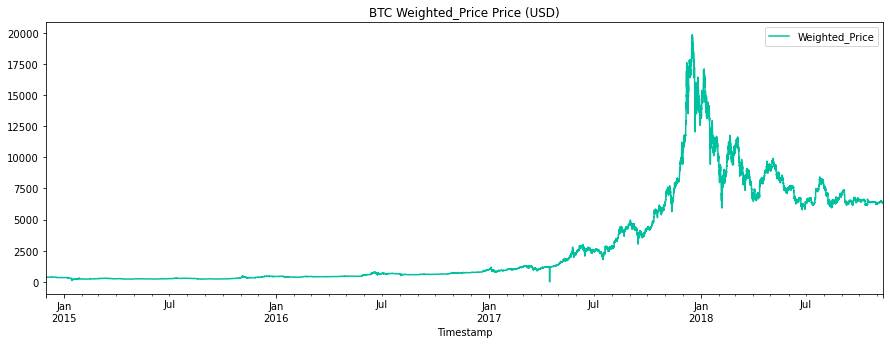

In [ ]:
# Defing a color array
color_pal = ["#F7766D", "#D36200", "#53AA00", "", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
#Plotting the Weighted price graph
_ = data.plot(style='', figsize=(15,5), color=color_pal[4], title='BTC Weighted_Price Price (USD)')

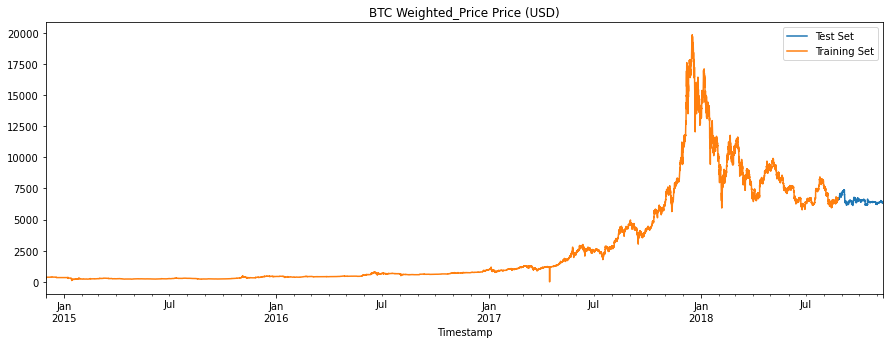

In [ ]:
# Ploting the graph to represent train and test dataset using outer join
_ = data_test \
    .rename(columns={'Weighted_Price': 'Test Set'}) \
    .join(data_train.rename(columns={'Weighted_Price': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='BTC Weighted_Price Price (USD)', style='')

In [ ]:
# importing the required libraries for LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
# allowing to add layers to the model
model = Sequential()
# Adding a LSTM layer with 128 neurons and activation as sigmoid.
model.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
# Adding a dropout layer
model.add(Dropout(0.2))
# Adding the dense layer
model.add(Dense(1))
# Compliling the model with loss as MSE and using adam optimizer.
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the model with input of X_train andy_train with 100 epochs
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=False)

In [ ]:
# Summarizing the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Reshaping our test data according to the input requirements
test_set = data_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))

# Predicting the model
predicted_BTC_price = model.predict(inputs)

# Reversing the input to its oroginal form
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

In [ ]:
# Adding the re transformed data to data frame
data_test['Weighted_Price_Prediction'] = predicted_BTC_price

# Concate the test and train data to a new data frame
data_all = pd.concat([data_test, data_train], sort=False)

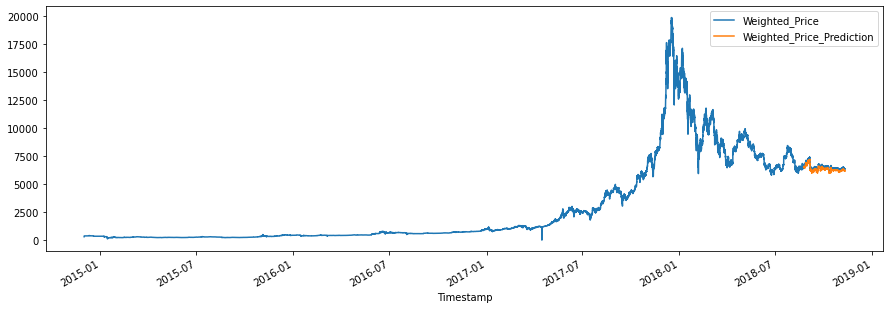

In [ ]:
# Ploting the predicted vs actual graph 
_ = data_all[['Weighted_Price','Weighted_Price_Prediction']].plot(figsize=(15, 5))

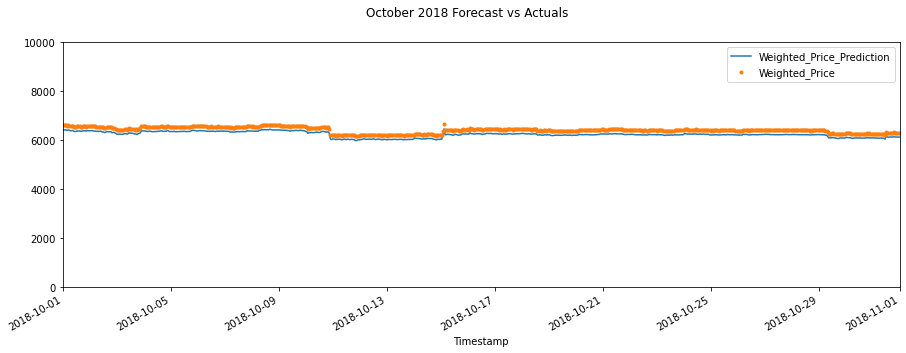

In [ ]:
# Ploting the predicted vs actual graph 
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Weighted_Price_Prediction','Weighted_Price']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='10-01-2018', upper='11-01-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('October 2018 Forecast vs Actuals')

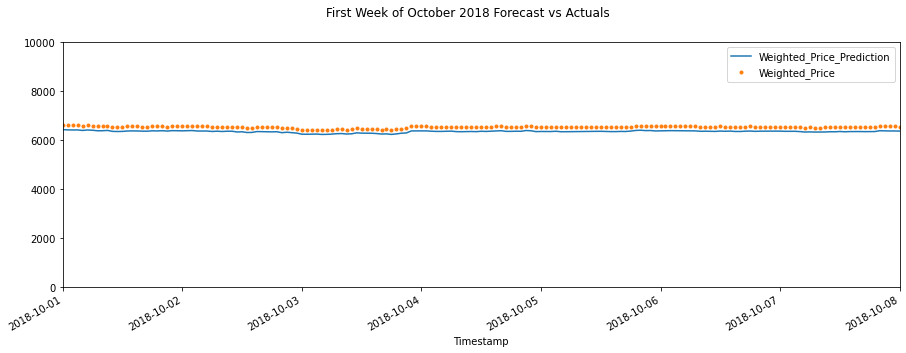

In [ ]:
# Ploting the predicted vs actual graph 
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Weighted_Price_Prediction','Weighted_Price']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='10-01-2018', upper='10-08-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('First Week of October 2018 Forecast vs Actuals')

In [ ]:
#Calculating the accuracy
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

33948.99879124947

In [ ]:
mean_absolute_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

184.10906110906197

In [ ]:
# Implementing XGBoost
# Importing the libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [ ]:
# reading the csv file
data = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv',parse_dates=[0], date_parser=dateparse) 
data['Timestamp'] = data['Timestamp'].dt.tz_localize(None)

# grouping the data according to timestamp
data = data.groupby([pd.Grouper(key='Timestamp', freq='H')]).first().reset_index()
data = data.set_index('Timestamp')
data = data[['Weighted_Price']]
data['Weighted_Price'].fillna(method='ffill', inplace=True)
data

,Weighted_Price
Timestamp,
2014-12-01 00:00:00,300.000000
2014-12-01 01:00:00,370.000000
2014-12-01 02:00:00,370.000000
2014-12-01 03:00:00,370.000000
2014-12-01 04:00:00,370.000000
...,...
2018-11-10 15:00:00,6358.393352
2018-11-10 16:00:00,6364.992297
2018-11-10 17:00:00,6361.263243


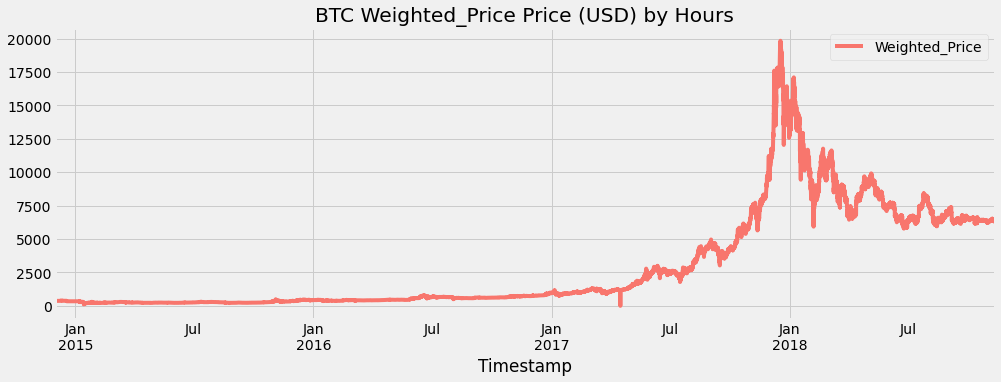

In [ ]:
#Declaring the colors
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
#Ploting the Weighted price graph
_ = data.plot(style='', figsize=(15,5), color=color_pal[0], title='BTC Weighted_Price Price (USD) by Hours')

In [ ]:
# Declaring the date to split our data
split_date = '25-Aug-2018'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

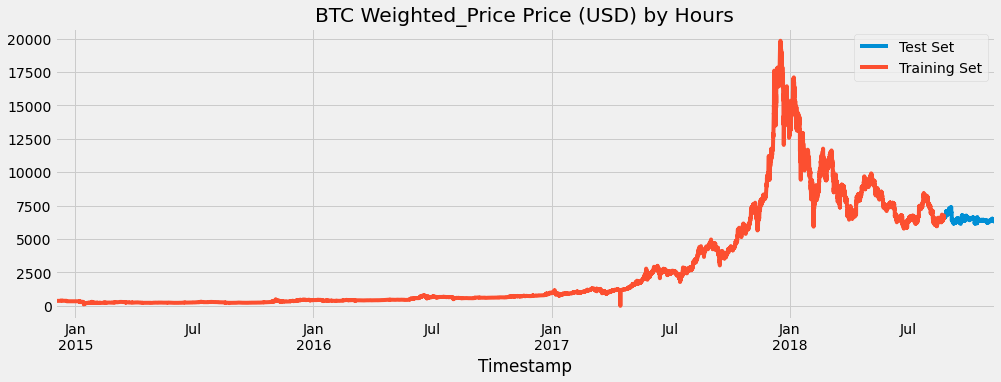

In [ ]:
# Ploting the test vs train data graph
_ = data_test \
    .rename(columns={'Weighted_Price': 'Test Set'}) \
    .join(data_train.rename(columns={'Weighted_Price': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='BTC Weighted_Price Price (USD) by Hours', style='')

In [ ]:
# defining the features
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['week'] = df['date'].dt.week
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','week']]
    if label:
        y = df[label]
        return X, y
    return X

In [ ]:
# Converting the data to train and test
X_train, y_train = create_features(data_train, label='Weighted_Price')
X_test, y_test = create_features(data_test, label='Weighted_Price')
X_train

C:\Users\ompur\AppData\Local\Temp/ipykernel_8920/3323643051.py:13: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,week
Timestamp,,,,,,,,
2014-12-01 00:00:00,0,0,4,12,2014,335,1,49
2014-12-01 01:00:00,1,0,4,12,2014,335,1,49
2014-12-01 02:00:00,2,0,4,12,2014,335,1,49
2014-12-01 03:00:00,3,0,4,12,2014,335,1,49
2014-12-01 04:00:00,4,0,4,12,2014,335,1,49
...,...,...,...,...,...,...,...,...
2018-08-24 20:00:00,20,4,3,8,2018,236,24,34
2018-08-24 21:00:00,21,4,3,8,2018,236,24,34
2018-08-24 22:00:00,22,4,3,8,2018,236,24,34


In [ ]:
# importing the xgb module
import xgboost as xgb
from xgboost import plot_importance, plot_tree

# adding the xgbregressor to ourt model
model =  xgb.XGBRegressor(booster='gbtree',min_child_weight=10,
                max_depth = 5, n_estimators = 100)
# fitting the train dataset into the model
model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

[05:23:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=10, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [ ]:
# Predicting the test data set
data_test['Weighted_Price_Prediction'] = model.predict(X_test)
# Concat the test and train data to new dataframe
data_all = pd.concat([data_test, data_train], sort=False)

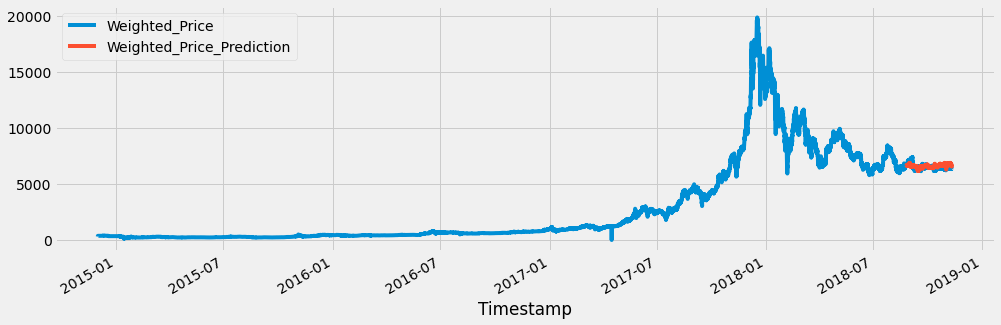

In [ ]:
# Ploting the prediction vs actual graph
_ = data_all[['Weighted_Price','Weighted_Price_Prediction']].plot(figsize=(15, 5))

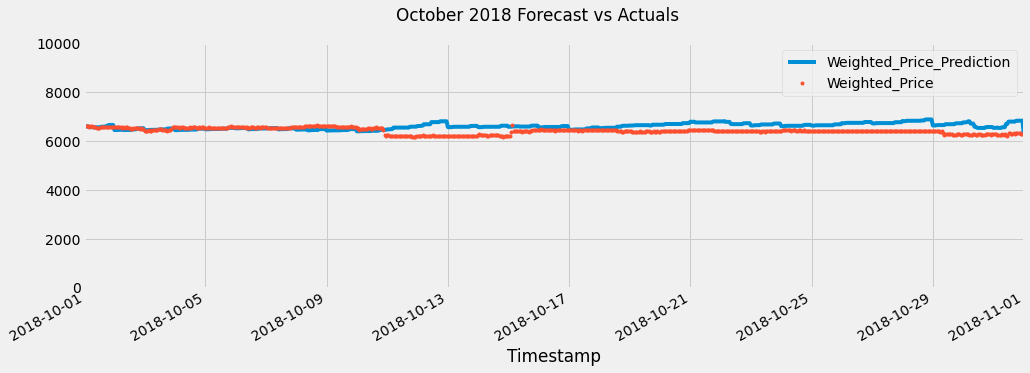

In [ ]:
# Ploting the prediction vs actual graph
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Weighted_Price_Prediction','Weighted_Price']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='10-01-2018', upper='11-01-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('October 2018 Forecast vs Actuals')

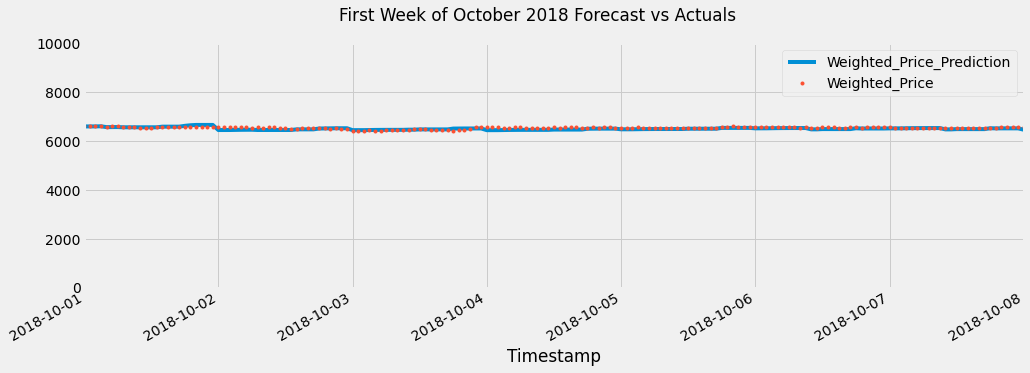

In [ ]:
# Ploting the prediction vs actual graph
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Weighted_Price_Prediction','Weighted_Price']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='10-01-2018', upper='10-08-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('First Week of October 2018 Forecast vs Actuals')

In [ ]:
#Evaluate the model
mean_squared_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

87054.32209220319

In [ ]:
mean_absolute_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

245.4616672141537